In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.rand(10,)

array([0.16640353, 0.4236076 , 0.51549934, 0.53838682, 0.58728024,
       0.51651843, 0.59893376, 0.13440791, 0.94127799, 0.47391072])

# Generating Sampling
Suppose we know how to sample from a distribution $q(x)$, then we can sample arbitrary distribution $p(y)$ related to $q(x)$ by a transformation $Y=f(X)$, where 
\begin{align}
p(y)=\frac{q(x)}{|f^{\prime}(x)|}.
\end{align}
Particularly, when $X\sim U(0,1)$ and $f$ is the inverse CDF of $Y$, we have $p(y)$ just as the pdf of $Y$.

In [ ]:
class sampling(object):
    def __init__(self):
        pass
    def generating(self):
    def accept_rej(self,n,M):
        self.a_r_sample=[]
        while len(self.a_r_sample)<n:
            theta,U=np.random.rand(2)
            p_theta=self.kernel(theta)
            if M*U<=p_theta:
                self.a_r_sample.append(theta)
                
        y,x=np.histogram(self.a_r_sample)
        plt.scatter(x[:-1],y/sum(y))
        
        return self.a_r_sample

# Acceptance-Rejection Sampling
We want to sample from a univariate distrubtion function $p(\theta)$. We may only know the kernel of the density say $p_*(\theta)$. The method is to find another $q(\theta)$ distribution with the same domain which is easy to sample and a constant $M$ such that
\begin{align}
p_*(\theta)\leq Mq(\theta)
\end{align}
for all values of $\theta$.

Then a unit $\theta$ sampled from $q$ is accepted with the probability 
\begin{align}
Pr(Mq(\theta)U\leq p_*(\theta)),
\end{align}
where $U\sim U[0,1]$ is a random variable satisfying uniform distribution.

To prove that the sampled data satisfies the distribution $p(\theta)$, we calculate the probability density under the condition that the data is accepted:
\begin{align}
P(\theta|A)&=\frac{P(A|\theta)q(\theta)}{P(A)}\\
            &=\frac{P(Mq(\theta)U\leq p_*(\theta)|\theta)q(\theta)}{\int d\theta P(A,\theta)}\\
            &=\frac{P(U\leq \frac{p_*(\theta)}{Mq(\theta)}|\theta) q(\theta)}{\int d\theta P(A,\theta)}\\
            &=\frac{\frac{p_*(\theta)}{Mq(\theta)}q(\theta)}{\int d\theta P(A,\theta)}\\
            &=\frac{\frac{p_*(\theta)}{M}}{\int d\theta \frac{p_*(\theta)}{M}}\\
            &=p(\theta)
\end{align}

In [61]:
class sampling(object):
    def __init__(self):
        pass
    def accept_rej(self,n,M):
        self.a_r_sample=[]
        while len(self.a_r_sample)<n:
            theta,U=np.random.rand(2)
            p_theta=self.kernel(theta)
            if M*U<=p_theta:
                self.a_r_sample.append(theta)
                
        y,x=np.histogram(self.a_r_sample)
        plt.scatter(x[:-1],y/sum(y))
        
        return self.a_r_sample

### Example 
Next, we use the acceptance-rejection method to sample the beta distribution. The pdf of beta distribution reads:
\begin{align}
p(\theta)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}I_{(0,1)}(\theta).
\end{align}
We can conveniently choose $p_{*}(\theta)=\theta^{a-1}(1-\theta)^{b-1}I_{(0,1)}(\theta)$. 
Then we plot the kernel: 

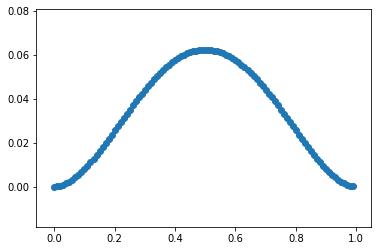

In [62]:
class beta_dis(sampling):
    def __init__(self,a,b):
        self.a=a
        self.b=b
    def kernel(self,x):
        return np.power(x,self.a-1)*np.power(1-x,self.b-1)
       
beta=beta_dis(3,3)
x=np.arange(0,1,0.01)
y=beta.kernel(x)
plt.scatter(x,y)

First, lets choose $q(\theta)=U(0,1)$ and $M=0.07$. Then we achieve a sample with length $n=1000$.

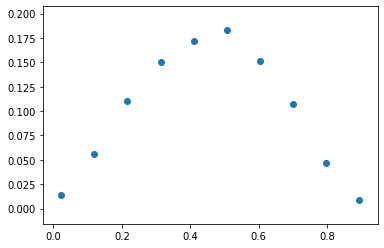

In [63]:
sample=beta.accept_rej(n=10000,M=0.07)

# Markov Chain
A Markov Chain is a random process $\theta^{t}$ where 
\begin{align}
Pr(\theta^k\in A|\theta^1,...,\theta^{k-1})=Pr(\theta^k\in A|\theta^{k-1}).
\end{align}
Thus the probability at time $k$ reads:
\begin{align} 
Pr(\theta^k\in A)&=\int_{A} \int...\int q(\theta^1,...,\theta^{k-1},\theta^k)\\
                 &=\int_{A} \int...\int q_{k|k-1}(\theta^k|\theta^1,...,\theta^{k-1})q_{k-1|k-2}(\theta^{k-1}|\theta^1,...,\theta^{k-2})...q_{2|1}(\theta^2|\theta^1)p_1(\theta^1)\\
                 &=\int_{A} \int...\int q_{k|k-1}(\theta^k|\theta^{k-1})q_{k-1|k-2}(\theta^{k-1}|\theta^{k-2})...q_{2|1}(\theta^2|\theta^1)q_1(\theta^1).\label{eq:1}
\end{align}
In the case of stationary transition probabilities, we have the same transition kernel at each time $q(u|v)$. Then the above equation becomes:
\begin{align} 
Pr(\theta^k\in A)=\int_{A} \int...\int q(\theta^k|\theta^{k-1})q(\theta^{k-1}|\theta^{k-2})...q(\theta^2|\theta^1)q_1(\theta^1).\label{eq:2}
\end{align}
An interesting phenomenon happens if at some time the distribution $q(\theta^{*})$ satisfies the following relation:
\begin{align}
q(\theta)=\int q(\theta|\theta^{*})q(\theta^{*})d\theta^*.
\end{align}
Then all random variables after this time has the identical pdf. This is the spirit of Markov Chain Monte Carlo. If we can construct a Markov Chain which has the stationary distribution same as the distribution we would like to sample, then we can use the random variables after station as the sampling of that distribution. However, to achieve this we relies on two assumptions: (1) we can find the starting distribution after which the Markov Chain can automatically goes into stationary distribution and the starting distribution can be sampled; (2) the Markov Chain only has one stationary distribution or we can controll which stationary distribution the Markov Chain evovles into.

## Metropolis Algorithm
The Metropolis algorithm construct the Markov Chain according to the following step:
1. Given the previous realization $\theta^{k}$, generates a new $\theta^{*}$ according to a candidate generating distribution:  $h(\theta^{*}|\theta^{k})$.
2. $\theta^*$ is accepted or rejected according to the probability $\alpha=\min\{1,\frac{q(\theta^*)h(\theta^{k}|\theta^*)}{q(\theta^{k})h(\theta^*|\theta^{k})}\}$.
Basicly,
\begin{align}
\theta^{k+1}=\begin{cases}\theta^{*} \ with\ probability\ \ \alpha,\\
\theta^{k} \  with\ probability\ \ 1-\alpha.
\\
\end{cases}
\end{align}

Next, we prove that  $q(\theta)$ is the stationary distribution generated this way.
\begin{align}
p(\theta^{k+1})=&\int d\theta^{k}q(\theta^{k+1}|\theta^{k})q(\theta^{k})\\
=&\int d\theta^{k}\int d\theta^{*}[\delta(\theta^{k+1}-\theta^{*})\alpha(\theta^{k},\theta^{*})h(\theta^{*}|\theta^{k})q(\theta^{k})\\
	&+\delta(\theta^{k+1}-\theta^{k})(1-\alpha(\theta^{k},\theta^{*}))h(\theta^{*}|\theta^{k})q(\theta^{k})]\\
=&	\int d\theta^{k}\alpha(\theta^{k},\theta^{k+1})h(\theta^{k+1}|\theta^{k})q(\theta^{k})
	+\int d\theta^{*}(1-\alpha(\theta^{k+1},\theta^{*}))h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})]\\
=&	\int d\theta^{*}[\alpha(\theta^{*},\theta^{k+1})h(\theta^{k+1}|\theta^{*})q(\theta^{*})+(1-\alpha(\theta^{k+1},\theta^{*}))h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})]\\
=&	[\int_{\alpha(\theta^{*},\theta^{k+1})\leq1}+\int_{\alpha(\theta^{*},\theta^{k+1})=1}][\alpha(\theta^{*},\theta^{k+1})h(\theta^{k+1}|\theta^{*})q(\theta^{*})+(1-\alpha(\theta^{k+1},\theta^{*}))h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})]\\
=&	\int_{\alpha(\theta^{*},\theta^{k+1})\leq1}\frac{q(\theta^{k+1})h(\theta^{*}|\theta^{k+1})}{q(\theta^{*})h(\theta^{k+1}|\theta^{*})}h(\theta^{k+1}|\theta^{*})q(\theta^{*})\\
	&+\int_{\alpha(\theta^{*},\theta^{k+1})=1}[h(\theta^{k+1}|\theta^{*})q(\theta^{*})+(1-\frac{q(\theta^{*})h(\theta^{k+1}|\theta^{*})}{q(\theta^{k+1})h(\theta^{*}|\theta^{k+1})})h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})]\\
=&	\int_{\alpha(\theta^{*},\theta^{k+1})\leq1}q(\theta^{k+1})h(\theta^{*}|\theta^{k+1})
	+\int_{\alpha(\theta^{*},\theta^{k+1})=1}	[h(\theta^{k+1}|\theta^{*})q(\theta^{*})+h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})-q(\theta^{*})h(\theta^{k+1}|\theta^{*})]\\
=&	\int_{\alpha(\theta^{*},\theta^{k+1})\leq1}q(\theta^{k+1})h(\theta^{*}|\theta^{k+1})+\int_{\alpha(\theta^{*},\theta^{k+1})=1}[h(\theta^{*}|\theta^{k+1})q(\theta^{k+1})]\\
=&	\int_{\alpha}d\theta^{*}q(\theta^{k+1})h(\theta^{*}|\theta^{k+1})\\
=&	q(\theta^{k+1})
\end{align}

In [ ]:
class sampling(object):
    def __init__(self):
        pass
    def accept_rej(self,n,M):
        self.a_r_sample=[]
        while len(self.a_r_sample)<n:
            theta,U=np.random.rand(2)
            p_theta=self.kernel(theta)
            if M*U<=p_theta:
                self.a_r_sample.append(theta)
                
        y,x=np.histogram(self.a_r_sample)
        plt.scatter(x[:-1],y/sum(y))
        
        return self.a_r_sample
    def metropolis(self,h):
        